In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler

from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv('heart.csv')
df = df.dropna()
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
Counter(df['target'])

Counter({1: 165, 0: 138})

In [5]:
pre_y = df['target']
pre_X = df.drop('target',axis=1)

In [6]:
smote = SMOTE(ratio='minority')
X1, y = smote.fit_sample(pre_X, pre_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [7]:
Counter(y)

Counter({1: 165, 0: 165})

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [9]:
X_test.shape[1]

13

In [10]:
classifier = Sequential()
classifier.add(Dense(400,activation='relu',kernel_initializer='random_normal',input_dim = X_test.shape[1]))
classifier.add(Dense(800,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(10,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
classifier.fit(X_train,y_train,batch_size = 20, epochs = 100,verbose = 0)
eval_model = classifier.evaluate(X_train,y_train)
eval_model






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








264/264 [==============================] - 0s 414us/step


[0.055226069621064446, 0.9848484848484849]

In [11]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.52)

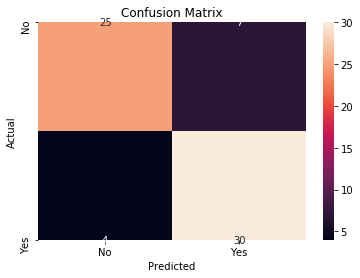

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax) # annot true means annotate cells

#labels title ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No','Yes']);ax.yaxis.set_ticklabels(['No','Yes']);

In [13]:
pre_X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [14]:
import pickle
import joblib
column_all = pre_X.columns
column_name = ('heart_columns.pkl')
joblib.dump(column_all,column_name)

['heart_columns.pkl']

In [15]:
import pickle
import joblib
filename = ('heart_model.pkl')
joblib.dump(classifier,filename)

['heart_model.pkl']

In [16]:
scalers = MinMaxScaler()
filename_2 = ('heart_scalers.pkl')
joblib.dump(scalers,filename_2)

['heart_scalers.pkl']

In [17]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3,shuffle=True,random_state=0)
cvscores = []
for train,test in kfold.split(X,y):
    #create model
    model=Sequential()
    model.add(Dense(200,input_dim = 13,activation = 'relu'))
    model.add(Dense(400,activation = 'relu'))
    model.add(Dense(4,activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    #fit the model
    model.fit(X[train],y[train],epochs=100,verbose=0)
    #evaluate the model
    scores = model.evaluate(X[test],y[test],verbose = 0)
    print("%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))
    cvscores.append(scores[1]*100)
print("%.2f%% (+/- %.2f%%)" %(np.mean(cvscores),np.std(cvscores)))


acc: 79.09%
acc: 81.82%
acc: 85.45%
82.12% (+/- 2.61%)


In [18]:
mdl = joblib.load('heart_model.pkl')

In [22]:
X = pd.read_csv('test.csv',sep =';')

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,35,1,0,115,300,1,0,167,0,0,1,0,2


In [24]:
sc = MinMaxScaler()
X_test = sc.fit_transform(X)

In [25]:
y_pred = mdl.predict(X_test)
y_pred = (y_pred>0.58)

In [26]:
y_pred

array([[ True]])

In [27]:
val = pd.DataFrame(y_pred,columns=['Status'])
val = val.replace({True:'presence',False:'no presence'})
val

,Status
0,presence
